# Capstone Project - by Dhruv Tuteja


## Import Data

Let's start off by importing and cleaning our data.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

path_python_material = ".."

In [5]:
df = pd.read_csv(f"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [6]:
df.shape

(100000, 143)

In [7]:
df_dropped = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "id", "funded_amnt", "funded_amnt_inv", "url", "title", "zip_code",
                      "addr_state", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp",
                      "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee",
                      "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "hardship_start_date", "hardship_end_date"], axis = 1)

Straight away, I have removed a number of columns from our dataset, for various reasons.

"Unnamed: 0.1" and "Unnamed: 0" I removed as we do not know what these columns represent and are therefore unable to interpret these meaningfully.

"id", "url", "zip_code" and "addr_state" I have removed as they do not add any value to our model. Although I did consider that "zip_code" may have some correlation with our target variable, the numerical nature of US zip codes would introduce ordinality to a variable that does not otherwise have it. For this reason, I have omitted this variable entirely and decided to focus on variables with a stronger correlation to our target variable.

Most of the remaining columns I have removed are those which contain data which would not be available to the lender at the time of the borrower's application. It is important not to consider these in our model so as to prevent data leakage.

Any other variables removed are simply due to lack of relevancy to our target variable.

In [9]:
df_dropped.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,home_improvement,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,credit_card,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,credit_card,7.22,0.0,Apr-2010,665.0,669.0,0.0,NaN,61.0,7.0,1.0,6001.0,52.6%,9.0,f,May-2020,789.0,785.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,159131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.0,NaN,NaN,NaN,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,NaN,1.0,NaN,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,24000.0,60 months,11.05%,522.42,B,B4,NaN,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,debt_consolidation,24.55,0.0,Oct-2005,750.0,754.0,0.0,NaN,NaN,15.0,0.0,6573.0,12.1%,23.0,w,May-2020,749.0,745.0,0

In [10]:
df_dropped.shape

(100000, 120)

We still have far too many variables to use in our model. Using too many variables is likely to cause issues with multicollinearity and overfitting in our model. 

However, we must first clean the data further to deal with strings and null values.

It seems likely that employment title will be a factor in predicting loan status so let's first deal with the "emp_title" column so we can meaningfully make use of it in our model. 

In [13]:
# Cleaning text data
df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()
df_dropped['emp_title_clean'].value_counts()[:10]

emp_title_clean
teacher             2121
manager             2062
owner               1245
registered nurse    1019
driver              1008
supervisor           978
sales                765
rn                   758
office manager       670
truck driver         612
Name: count, dtype: int64

In [14]:
df_dropped['emp_title_manager'] = df_dropped['emp_title_clean'].str.contains("manager")
df_dropped['emp_title_manager'].value_counts()

emp_title_manager
False    77148
True     13898
Name: count, dtype: int64

Employment title may not give us the full picture of the loan applicant, so while it may hold some importance, I believe other features such as income will be more important in our model. Thus, we will only use the flag of whether or not the applicant is a manager to retain some information without including too much unnecessary data.

Now that we have our "emp_title_manager" flag, let's remove any unnecessary data relating to employment title.

In [17]:
df_dropped = df_dropped.drop(columns=["emp_title", "emp_title_clean"])

In [18]:
df_dropped.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,emp_title_manager
0,4000.0,36 months,13.08%,134.93,B,B5,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,home_improvement,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,False
1,24000.0,60 months,9.16%,500.07,B,B2,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,credit_card,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,False
2,5000.0,36 months,10.49%,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,credit_card,7.22,0.0,Apr-2010,665.0,669.0,0.0,NaN,61.0,7.0,1.0,6001.0,52.6%,9.0,f,May-2020,789.0,785.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,159131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.0,NaN,NaN,NaN,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,NaN,1.0,NaN,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,False
3,24000.0,60 months,11.05%,522.42,B,B4,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,debt_consolidation,24.55,0.0,Oct-2005,750.0,754.0,0.0,NaN,NaN,15.0,0.0,6573.0,12.1%,23.0,w,May-2020,749.0,745.

Let's continue with further cleaning our data.

In [20]:
# Removing text from "term" column
df_dropped['term'] = df_dropped['term'].replace(r'\s*months', '', regex=True)

In [21]:
# Removing "%" symbol from "int_rate" column
df_dropped['int_rate'] = df_dropped['int_rate'].astype(str).str.rstrip('%').astype('float')

df_dropped.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,emp_title_manager
0,4000.0,36,13.08,134.93,B,B5,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,home_improvement,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,False
1,24000.0,60,9.16,500.07,B,B2,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,credit_card,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,False
2,5000.0,36,10.49,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,credit_card,7.22,0.0,Apr-2010,665.0,669.0,0.0,NaN,61.0,7.0,1.0,6001.0,52.6%,9.0,f,May-2020,789.0,785.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,159131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.0,NaN,NaN,NaN,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,NaN,1.0,NaN,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,False
3,24000.0,60,11.05,522.42,B,B4,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,debt_consolidation,24.55,0.0,Oct-2005,750.0,754.0,0.0,NaN,NaN,15.0,0.0,6573.0,12.1%,23.0,w,May-2020,749.0,745.0,0.0,NaN,1.0,Individual,NaN,NaN

In [22]:
# A null value for 'dti' suggests income is zero. So we will replace the null values in this column with an artificially high value, 999.
# We will do the same for "dti_joint".
df_dropped['dti'] = df_dropped['dti'].fillna(999)
df_dropped['dti_joint'] = df_dropped['dti_joint'].fillna(999)

In [23]:
# Extracting features from date columns
df_dropped['issue_d'] = pd.to_datetime(df_dropped['issue_d'])
df_dropped['earliest_cr_line'] = pd.to_datetime(df_dropped['earliest_cr_line'])
df_dropped['last_credit_pull_d'] = pd.to_datetime(df_dropped['last_credit_pull_d'])

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20724\3210903364.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped['issue_d'] = pd.to_datetime(df_dropped['issue_d'])
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20724\3210903364.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped['earliest_cr_line'] = pd.to_datetime(df_dropped['earliest_cr_line'])
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20724\3210903364.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped['last_credit_pull_d'] = pd.to_datetime(df_dropped['last_credit_pull_d'])


In [24]:
# select non-numeric columns
df_text = df_dropped.select_dtypes(exclude=[np.number])
df_text.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,emp_title_manager
0,36,B,B5,10+ years,MORTGAGE,Source Verified,2020-03-01,Current,n,home_improvement,2004-12-01,82.8%,w,2020-05-01,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,False
1,60,B,B2,6 years,RENT,Source Verified,2016-02-01,Current,n,credit_card,2004-01-01,64.5%,w,2020-05-01,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,False
2,36,B,B3,10+ years,MORTGAGE,Not Verified,2015-01-01,Fully Paid,n,credit_card,2010-04-01,52.6%,f,2020-05-01,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,False
3,60,B,B4,NaN,MORTGAGE,Not Verified,2018-06-01,Current,n,debt_consolidation,2005-10-01,12.1%,w,2020-05-01,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN
4,60,C,C2,10+ years,MORTGAGE,Source Verified,2018-01-01,Fully Paid,n,debt_consolidation,2008-04-01,27.1%,w,2020-02-01,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,False


In [25]:
# Removing some additional columns which are not relevant to our model

df_dropped = df_dropped.drop(columns=["verification_status_joint", "sec_app_earliest_cr_line", "hardship_reason", "payment_plan_start_date"])

In [26]:
#Converting datetime objects into numerical data
for col in ["issue_d", "earliest_cr_line", "last_credit_pull_d"]:
    df_dropped[col] = df_dropped[col].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

In [27]:
# Removing "%" symbol from "revol_util" column
df_dropped['revol_util'] = df_dropped['revol_util'].astype(str).str.rstrip('%').astype('float')

In [28]:
#Converting datetime objects into numerical data
df_dropped["term"] = pd.to_numeric(df_dropped["term"])

In [29]:
# Using label encoding for ordinal data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_dropped["grade_encoded"] = le.fit_transform(df_dropped["grade"])
df_dropped["sub_grade_encoded"] = le.fit_transform(df_dropped["sub_grade"])

df_dropped = df_dropped.drop(columns=["grade", "sub_grade"])

In [30]:
# Using dummy encoding for non-ordinal data

df_dropped = pd.get_dummies(df_dropped, columns=["home_ownership", "verification_status", "pymnt_plan",
                                                 "purpose", "initial_list_status", "application_type", "hardship_flag",
                                                 "hardship_type", "hardship_status", "hardship_loan_status", "debt_settlement_flag",
                                                 "emp_title_manager"])
                                                 

In [31]:
# Creating an imputer to replace certain null values with the mean value of that column.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_dropped[["fico_range_low", "fico_range_high", "sec_app_fico_range_low", "sec_app_fico_range_high"]] = imputer.fit_transform(df_dropped[["fico_range_low", "fico_range_high", "sec_app_fico_range_low", "sec_app_fico_range_high"]])

In [32]:
# Employment length is likely to be a useful feature so let's clean up this column.

df_dropped['emp_length'] = df_dropped['emp_length'].str.strip('years')

#Let's deal with the "10+" entries
df_dropped['emp_length'] = df_dropped['emp_length'].str.strip()
df_dropped['emp_length'].mask(df_dropped['emp_length'] == "10+", 11, inplace=True)

#Let's deal with any null values
df_dropped['emp_length'] = df_dropped['emp_length'].fillna(0)

#Let's deal with "<1" entries
df_dropped['emp_length'].mask(df_dropped['emp_length'] == "< 1", 0.5, inplace=True)

df_dropped['emp_length'] = pd.to_numeric(df_dropped['emp_length'])

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20724\2206211932.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['emp_length'].mask(df_dropped['emp_length'] == "10+", 11, inplace=True)
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20724\2206211932.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [33]:
# Checking null values
null_values = df_dropped.columns[df_dropped.isna().sum() > 0]
print(null_values)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'revol_util',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', '

We can see above which features have null values. Whilst most of these null values can be replaced with zero and not affect the meaning of the data, this does not work for certain features.

For example, a null value in the 'mths_since_last_delinq' column would likely indicate that this applicant has never had a delinquency. In this case, replacing null values with zero would give the opposite meaning to the data, implying that the applicant has been very recently delinquent in their repayments. For this column, I will replace null values with an artificially high figure, i.e. "999".

In [35]:
df_dropped["mths_since_last_delinq"] = df_dropped["mths_since_last_delinq"].fillna(999)

In [36]:
# Replacing null values with 0.
df_dropped[null_values] = df_dropped[null_values].fillna(0)

In [37]:
df_dropped.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,grade_encoded,sub_grade_encoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,hardship_type_CVD19SKIP,hardship_type_DR0250PV01,hardship_type_DR02INTV01,hardship_type_INTEREST ONLY-3 MONTHS DEFERRAL,hardship_type_ST03INTV01,hardship_type_ST0650PV01,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETE,hardship_status_COMPLETED,hardship_loan_status_ACTIVE,hardship_loan_status_CURRENT,hardship_loan_status_Current,hardship_loan_status_DELINQUENT,hardship_loan_status_GRACE_CURRENT,hardship_loan_status_INCOLLECTION,hardship_loan_status_In Grace Period,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),debt_settlement_flag_N,debt_settlement_flag_Y,emp_title_manager_False,emp_title_manager_True
0,4000.0,36,13.08,134.93,11.0,48000.0,1.583021e+09,Current,20.25,1.0,1.101859e+09,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8,12.0,1.588291e+09,669.0,665.0,1.0,0.0,1.0,0.0,999.0,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,0.0,0.0,0.0,0.0,179.0,75.0,38.0,16.0,2.0,0.0,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,0.0,1.0,0.0,395328.0,11948.0,0.0,17928.0,0.0,673.892433,677.892582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,24000.0,60,9.16,500.07,6.0,57000.0,1.454285e+09,Current,25.33,0.0,1.072915e+09,680.0,684.0,0.0,999.0,0.0,10.0,0.0,22697.0,64.5,24.0,1.588291e+09,704.0,700.0,0.0,0.

In [38]:
df_dropped.dtypes

loan_amnt                                        float64
term                                               int64
int_rate                                         float64
installment                                      float64
emp_length                                       float64
annual_inc                                       float64
issue_d                                          float64
loan_status                                       object
dti                                              float64
delinq_2yrs                                      float64
earliest_cr_line                                 float64
fico_range_low                                   float64
fico_range_high                                  float64
inq_last_6mths                                   float64
mths_since_last_delinq                           float64
mths_since_last_record                           float64
open_acc                                         float64
pub_rec                        

In [39]:
df_dropped.shape

(100000, 157)

Now we have our data in a format that can be used for our model. However, we still have a lot of features. Let's see if we can reduce the number of features.

However, before we start reducing features, let's take a look at our correlation matrix.

In [41]:
# Creating a seperate dataframe without "loan_status" which is non-numerical so I can calculate a correlation matrix.
df_dropped_corr = df_dropped.drop(columns=["loan_status"])

In [42]:
df_dropped_corr.corr(min_periods=100)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,grade_encoded,sub_grade_encoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,hardship_type_CVD19SKIP,hardship_type_DR0250PV01,hardship_type_DR02INTV01,hardship_type_INTEREST ONLY-3 MONTHS DEFERRAL,hardship_type_ST03INTV01,hardship_type_ST0650PV01,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETE,hardship_status_COMPLETED,hardship_loan_status_ACTIVE,hardship_loan_status_CURRENT,hardship_loan_status_Current,hardship_loan_status_DELINQUENT,hardship_loan_status_GRACE_CURRENT,hardship_loan_status_INCOLLECTION,hardship_loan_status_In Grace Period,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),debt_settlement_flag_N,debt_settlement_flag_Y,emp_title_manager_False,emp_title_manager_True
loan_amnt,1.000000,0.390571,0.066353,0.943736,0.095415,0.249457,0.078502,0.040666,-0.012540,-0.131088,0.114610,0.114609,-0.035071,0.036227,-0.065895,0.174131,-0.058210,0.332163,0.098793,0.185355,0.046319,0.091484,0.074173,-0.022770,-0.058776,NaN,0.172778,-0.139780,-0.003170,-0.026457,0.304419,-0.003643,0.049184,0.005287,0.029072,0.019896,0.134543,-0.000542,-0.020133,-0.010938,0.320634,0.040581,0.352872,0.004853,0.073806,0.024108,0.000319,0.227130,0.214618,0.067243,-0.010575,-0.000794,0.143294,0.171591,0.060685,0.041420,0.215315,0.045351,-0.036160,0.004969,-0.038081,-0.058162,0.196639,0.156259,0.213080,0.190386,0.087963,0.161789,0.156550,0.156492,0.180215,-0.000333,-0.002253,-0.025359,-0.022415,0.099854,0.033365,-0.075707,0.000668,0.334556,0.277469,0.372867,0.212659,0.172479,5.730749e-02,5.730857e-02,0.054328,0.134555,0.149065,0.131465,0.104765,0.145716,0.001120,0.003739,0.080490,0.078135,0.080490,0.025880,0.142593,0.190268,0.069565,0.061902,0.063477,-5.184629e-03,0.173721,-4.760222e-03,-3.161490e-03,-0.02

In [43]:
def get_redundant_pairs(df_dropped_corr):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_dropped_corr.columns
    for i in range(0, df_dropped_corr.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    
def get_top_abs_correlations(df_dropped_corr, n=5):
    au_corr = df_dropped_corr.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_dropped_corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_dropped_corr, 10))

Top Absolute Correlations
initial_list_status_f        initial_list_status_w          1.000000
deferral_term                hardship_length                1.000000
hardship_flag_Y              hardship_status_ACTIVE         1.000000
application_type_Individual  application_type_Joint App     1.000000
debt_settlement_flag_N       debt_settlement_flag_Y         1.000000
sec_app_fico_range_low       sec_app_fico_range_high        1.000000
fico_range_low               fico_range_high                1.000000
dti_joint                    application_type_Joint App     0.999965
                             application_type_Individual    0.999965
num_actv_rev_tl              num_rev_tl_bal_gt_0            0.987236
dtype: float64


We can remove some of the most highly correlated features as this will adversely affect our model.

In [45]:
df_dropped = df_dropped.drop(columns=["initial_list_status_f", "deferral_term", "hardship_flag_Y",
                                      "application_type_Joint App", "debt_settlement_flag_N", "sec_app_fico_range_low",
                                      "fico_range_low", "application_type_Joint App", "num_rev_tl_bal_gt_0"])

We will first implement a baseline Random Forest model.

In [47]:
# Let's define our features and target variable and drop the target variable from X

X, y = df_dropped.loc[ : , (df_dropped.columns != "loan_status")], df_dropped["loan_status"]

print(f"Number of columns: {len(X.columns)}")

Number of columns: 148


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Since our target variable is categorical, our model cannot read it as it is. Instead, we need to convert this to a numerical value so I will use label encoding to assign a numerical value to each class of loan_status.

We are doing this step after splitting our data in order to prevent data leakage.

In [51]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [52]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
# Applying Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf,
          n_features_to_select=20,
          step=15,                  
          verbose = 5)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 148 features.
Fitting estimator with 133 features.
Fitting estimator with 118 features.
Fitting estimator with 103 features.
Fitting estimator with 88 features.
Fitting estimator with 73 features.
Fitting estimator with 58 features.
Fitting estimator with 43 features.
Fitting estimator with 28 features.


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20,
    step=15, verbose=5)

In [54]:
selected_features = X_train.columns[rfe.support_]
X_columns = X.columns
selected_features_names = X_columns[rfe.support_]
print("Selected Features by RFE:")
print(f"Index: {selected_features}")
print(f"Column names: {selected_features_names}")

Selected Features by RFE:
Index: Index(['loan_amnt', 'term', 'int_rate', 'installment', 'issue_d', 'dti',
       'earliest_cr_line', 'revol_bal', 'revol_util', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'max_bal_bc', 'all_util', 'avg_cur_bal',
       'mo_sin_old_rev_tl_op', 'debt_settlement_flag_Y'],
      dtype='object')
Column names: Index(['loan_amnt', 'term', 'int_rate', 'installment', 'issue_d', 'dti',
       'earliest_cr_line', 'revol_bal', 'revol_util', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'max_bal_bc', 'all_util', 'avg_cur_bal',
       'mo_sin_old_rev_tl_op', 'debt_settlement_flag_Y'],
      dtype='object')


In [55]:
from scipy.stats import skew

# Calculating Summary Statistics
mean_loan = df_dropped['loan_amnt'].mean()
median_loan = df_dropped['loan_amnt'].median()
mode_loan = df_dropped['loan_amnt'].mode()[0]
std_loan = df_dropped['loan_amnt'].std()
percentiles_loan = df_dropped['loan_amnt'].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df_dropped['loan_amnt'])

print(f"Mean Loan Amount: {mean_loan}")
print(f"Median Loan Amount: {median_loan}")
print(f"Mode Loan Amount: {mode_loan}")
print(f"Standard Deviation of Loan Amount: {std_loan}")
print(f"Loan Amount Percentiles: \n{percentiles_loan}")
print("Skewness:", skewness_value)

Mean Loan Amount: 15332.373
Median Loan Amount: 13000.0
Mode Loan Amount: 10000.0
Standard Deviation of Loan Amount: 9468.189883376823
Loan Amount Percentiles: 
0.25     8000.0
0.50    13000.0
0.75    20000.0
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999


By calculating the metrics above, we can see that the loan_amnt data has a moderate skew. 

We can tackle this by using a log transformation.

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_20724\2474239429.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dropped['loan_amnt_log'] = np.log(df_dropped['loan_amnt'] + 1) # Adding +1 to avoid log(0)


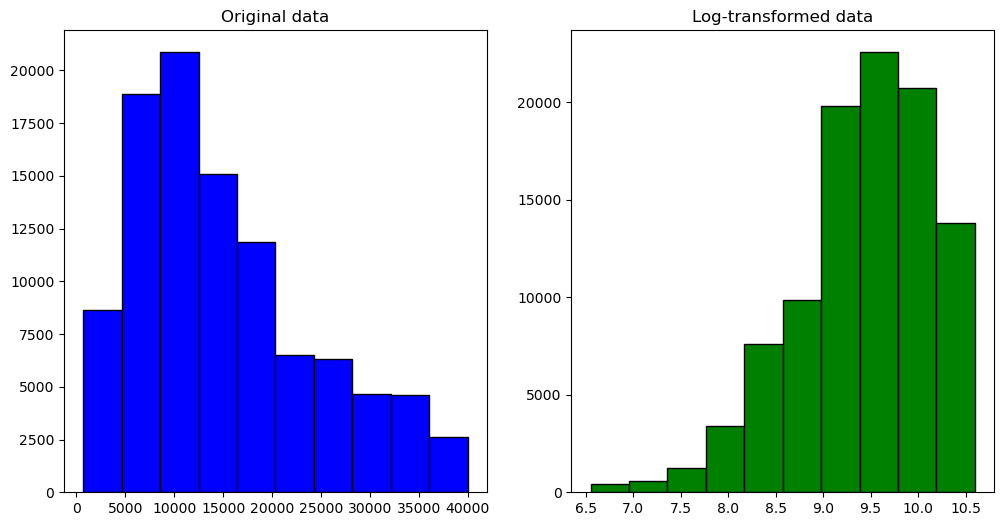

Skewness before log transform: 0.7887250378394999
Skewness after log transform: -0.6505299680118821


In [57]:
import matplotlib.pyplot as plt

# Log transformation
df_dropped['loan_amnt_log'] = np.log(df_dropped['loan_amnt'] + 1) # Adding +1 to avoid log(0)

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_dropped['loan_amnt'], bins=10, color='blue', edgecolor='black')
plt.title('Original data')

plt.subplot(1, 2, 2)
plt.hist(df_dropped['loan_amnt_log'], bins=10, color='green', edgecolor='black')
plt.title('Log-transformed data')

plt.show()

print(f"Skewness before log transform: {skew(df_dropped['loan_amnt'])}")
print(f"Skewness after log transform: {skew(df_dropped['loan_amnt_log'])}")

We can see that applying a log transformation has not solved the skewness problem, the distribution of the data has just shifted from right skewness to left skewness. 

Given this result, I will stick to using my original data.

In [59]:
# Train the Random Forest classifier on the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Evaluate the model performance on the test set
y_pred_selected = rf_selected.predict(X_test[selected_features])
y_prob_selected = rf_selected.predict_proba(X_test[selected_features])

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def model_evaluation_report(X_test, y_test, y_pred, y_prob):
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    print(f'Confusion Matrix:\n{cm}')

In [62]:
model_evaluation_report(X_test[selected_features], y_test, y_pred_selected, y_prob_selected)

Accuracy: 0.8803
Precision: 0.8765105191853556
Recall: 0.8803
F1-Score: 0.8748294331980716
ROC-AUC: 0.9618005808049885
Confusion Matrix:
[[ 2817   134     0     0     0   641     0     0     0     0]
 [   97 10189     0     0     0   425     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     1]
 [    4     0     0     0     0     4     0     0     0     0]
 [    1     0     0     1     1    19     0     0     0     0]
 [  478  1454     0     0     0 13400     0     0     0     0]
 [    7    89     0     0     0     9     0     0     0     0]
 [    0    18     0     0     0     0     0     0     0     0]
 [    3    27     0     0     0     4     0     0     0     0]
 [   58   103     0     0     0    10     0     0     0     2]]


C:\Users\Dhruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now that we have implemented our baseline random forest model, I will implement a challenger neural network model to compare results.

In [64]:
# Let's define our features and target variable and drop the target variable from X

X_nn, y_nn = df_dropped.loc[ : , (df_dropped.columns != "loan_status")], df_dropped["loan_status"]

print(f"Number of columns: {len(X_nn.columns)}")

Number of columns: 149


In [65]:
features_nn = list(X_nn.columns.values)

In [66]:
# Applying Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_nn_scaled = scaler.fit_transform(X_nn)

# Convert back to DataFrame with same column names
X_nn_scaled_df = pd.DataFrame(X_nn_scaled, columns=features_nn)
X_nn_scaled_df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,grade_encoded,sub_grade_encoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Individual,hardship_flag_N,hardship_type_CVD19SKIP,hardship_type_DR0250PV01,hardship_type_DR02INTV01,hardship_type_INTEREST ONLY-3 MONTHS DEFERRAL,hardship_type_ST03INTV01,hardship_type_ST0650PV01,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETE,hardship_status_COMPLETED,hardship_loan_status_ACTIVE,hardship_loan_status_CURRENT,hardship_loan_status_Current,hardship_loan_status_DELINQUENT,hardship_loan_status_GRACE_CURRENT,hardship_loan_status_INCOLLECTION,hardship_loan_status_In Grace Period,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),debt_settlement_flag_Y,emp_title_manager_False,emp_title_manager_True,loan_amnt_log
0,0.083969,0.0,0.302570,0.066234,1.000000,0.004364,0.961754,0.02125,0.055556,0.853092,0.121359,0.00,0.019019,0.887097,0.046512,0.019231,0.001795,0.473143,0.096491,0.991746,0.787059,0.786982,0.142857,0.0,0.0,0.0,1.0,0.0,0.02264,0.064183,0.000000,0.019608,0.000000,0.035714,0.031311,0.010777,0.153846,0.000000,0.000000,0.000000,0.337143,0.001800,0.041667,0.000000,0.000000,0.023810,0.137268,0.000000,0.000000,0.0,0.0,0.179179,0.092822,0.102151,0.063745,0.042553,0.000000,0.100529,0.666667,0.103825,0.028571,0.00,0.027778,0.000000,0.016949,0.054945,0.027778,0.054348,0.048780,0.0,0.0,0.0,0.000000,0.750,0.000,0.142857,0.000000,0.092670,0.010274,0.000000,0.017414,0.0,0.437557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.264706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.430694
1,0.592875,1.0,0.149922,0.281361,0.545455,0.005182,0.652047,0.02633,0.000000,0.842020,0.194175,0.00,1.000000,0.000000,0.116279,0.000000,0.020488,0.368571,0.201754,0.991746,0.828235,0.828402,0.000000,0.0,0.0,0.0,1.0

In [67]:
X_nn_scaled_df.dtypes

loan_amnt                                        float64
term                                             float64
int_rate                                         float64
installment                                      float64
emp_length                                       float64
annual_inc                                       float64
issue_d                                          float64
dti                                              float64
delinq_2yrs                                      float64
earliest_cr_line                                 float64
fico_range_high                                  float64
inq_last_6mths                                   float64
mths_since_last_delinq                           float64
mths_since_last_record                           float64
open_acc                                         float64
pub_rec                                          float64
revol_bal                                        float64
revol_util                     

In [68]:
# We must first label encode our target variable as the different classes of loan statuses are strings which cannot directly be used in our model.
le = LabelEncoder()
y_nn_encoded = le.fit_transform(y_nn)

In [69]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn_scaled_df, y_nn_encoded, test_size=0.3, random_state=42)

In [70]:
# Since we are implementing a multi-class classification model, we must one-hot encode our target variable.
# We apply one-hot encoding after we have split our data so as to prevent data leakage.

from tensorflow.keras.utils import to_categorical

y_train_nn_encoded = to_categorical(y_train_nn, num_classes=10)
y_test_nn_encoded = to_categorical(y_test_nn, num_classes=10)

In [71]:
df_dropped.loan_status.value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

We can see above that there are 10 different classes of loan_status. Knowing this, we will build our neural network architecture accordingly, i.e. there will be 10 nodes in the final layer.

In [73]:
!pip install tensorflow
!pip install keras
from keras.models import Sequential
from keras.layers import Dense

model_4 = Sequential()

model_4.add(Dense(25, input_dim=X_nn_scaled_df.shape[1], activation='relu'))

model_4.add(Dense(20, activation='relu'))

model_4.add(Dense(15, activation='relu'))

# As every data point is a member of exactly one class, we can use the "softmax" activation function to increase efficiency.
model_4.add(Dense(10, activation='softmax'))

# Compile the model
model_4.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

C:\Users\Dhruv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
history = model_4.fit(X_train_nn, y_train_nn_encoded, epochs=15, batch_size=16, validation_split=0.2 )

Epoch 1/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.9472 - Precision: 0.7108 - Recall: 0.5377 - accuracy: 0.6570 - loss: 0.8876 - val_AUC: 0.9803 - val_Precision: 0.8039 - val_Recall: 0.7527 - val_accuracy: 0.7831 - val_loss: 0.5555
Epoch 2/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.9835 - Precision: 0.8123 - Recall: 0.7809 - accuracy: 0.7971 - loss: 0.5007 - val_AUC: 0.9844 - val_Precision: 0.8116 - val_Recall: 0.7858 - val_accuracy: 0.7989 - val_loss: 0.4880
Epoch 3/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9851 - Precision: 0.8143 - Recall: 0.7910 - accuracy: 0.8043 - loss: 0.4754 - val_AUC: 0.9835 - val_Precision: 0.8027 - val_Recall: 0.7851 - val_accuracy: 0.7946 - val_loss: 0.4991
Epoch 4/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.9858 - Precision: 0.8193 - Recall: 0.7980 - accuracy: 0.8106 - loss: 0.4627 - val_AUC: 0.9862 - val_Precision: 0.8240 - val_Recall: 0.8038 - val_accuracy: 0.8143 - val_loss: 0.4509
Epoch 5/15
3500/3500 

In [75]:
# Make predictions
y_prob_nn = model_4.predict(X_test_nn)
y_pred_nn = np.argmax(y_prob_nn, axis=1)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step


In [76]:
model_evaluation_report(X_test_nn, y_test_nn, y_pred_nn, y_prob_nn)

Accuracy: 0.8088
Precision: 0.8096961691900967
Recall: 0.8088
F1-Score: 0.8015079195355731
ROC-AUC: 0.9328623895901599
Confusion Matrix:
[[ 1986   342     0     0     1  1262     0     0     0     1]
 [   37  9729     0     0     0   937     1     0     0     7]
 [    2     2     0     0     0     0     0     0     0     1]
 [    0     0     0     0     4     4     0     0     0     0]
 [    0     0     0     0     7    15     0     0     0     0]
 [  303  2501     0     0     0 12528     0     0     0     0]
 [    3    91     0     0     0     9     1     0     0     1]
 [    0    18     0     0     0     0     0     0     0     0]
 [    2    29     0     0     0     3     0     0     0     0]
 [   31   114     0     0     0    14     1     0     0    13]]


C:\Users\Dhruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Let's see if our model will perform better if we use the features we selected above using RFE.

In [78]:
X_nn_2, y_nn_2 = df_dropped.loc[ : , (X_columns)], df_dropped["loan_status"]

print(f"Number of columns: {len(X_nn_2.columns)}")

Number of columns: 148


In [79]:
features_nn_2 = list(X_nn_2.columns.values)

# Applying Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_nn_scaled_2 = scaler.fit_transform(X_nn_2)

# Convert back to DataFrame with same column names
X_nn_scaled_df_2 = pd.DataFrame(X_nn_scaled_2, columns=features_nn_2)
X_nn_scaled_df_2.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,grade_encoded,sub_grade_encoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Individual,hardship_flag_N,hardship_type_CVD19SKIP,hardship_type_DR0250PV01,hardship_type_DR02INTV01,hardship_type_INTEREST ONLY-3 MONTHS DEFERRAL,hardship_type_ST03INTV01,hardship_type_ST0650PV01,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETE,hardship_status_COMPLETED,hardship_loan_status_ACTIVE,hardship_loan_status_CURRENT,hardship_loan_status_Current,hardship_loan_status_DELINQUENT,hardship_loan_status_GRACE_CURRENT,hardship_loan_status_INCOLLECTION,hardship_loan_status_In Grace Period,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),debt_settlement_flag_Y,emp_title_manager_False,emp_title_manager_True
0,0.083969,0.0,0.302570,0.066234,1.000000,0.004364,0.961754,0.02125,0.055556,0.853092,0.121359,0.00,0.019019,0.887097,0.046512,0.019231,0.001795,0.473143,0.096491,0.991746,0.787059,0.786982,0.142857,0.0,0.0,0.0,1.0,0.0,0.02264,0.064183,0.000000,0.019608,0.000000,0.035714,0.031311,0.010777,0.153846,0.000000,0.000000,0.000000,0.337143,0.001800,0.041667,0.000000,0.000000,0.023810,0.137268,0.000000,0.000000,0.0,0.0,0.179179,0.092822,0.102151,0.063745,0.042553,0.000000,0.100529,0.666667,0.103825,0.028571,0.00,0.027778,0.000000,0.016949,0.054945,0.027778,0.054348,0.048780,0.0,0.0,0.0,0.000000,0.750,0.000,0.142857,0.000000,0.092670,0.010274,0.000000,0.017414,0.0,0.437557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.264706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.592875,1.0,0.149922,0.281361,0.545455,0.005182,0.652047,0.02633,0.000000,0.842020,0.194175,0.00,1.000000,0.000000,0.116279,0.000000,0.020488,0.368571,0.201754,0.991746,0.828235,0.828402,0.000000,0.0,0.0,0.0,1.0,0.0,0.00000,0.015317,0

In [80]:
le = LabelEncoder()
y_nn_encoded_2 = le.fit_transform(y_nn_2)

In [81]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train_nn_2, X_test_nn_2, y_train_nn_2, y_test_nn_2 = train_test_split(X_nn_scaled_df_2, y_nn_encoded_2, test_size=0.3, random_state=42)

In [82]:
from tensorflow.keras.utils import to_categorical

y_train_nn_encoded_2 = to_categorical(y_train_nn_2, num_classes=10)
y_test_nn_encoded_2 = to_categorical(y_test_nn_2, num_classes=10)

In [83]:
model_5 = Sequential()

model_5.add(Dense(25, input_dim=X_nn_scaled_df_2.shape[1], activation='relu'))

model_5.add(Dense(20, activation='relu'))

model_5.add(Dense(15, activation='relu'))

# As every data point is a member of exactly one class, we can use the "softmax" activation function to increase efficiency.
model_5.add(Dense(10, activation='softmax'))

# Compile the model
model_5.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

C:\Users\Dhruv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
history_2 = model_5.fit(X_train_nn_2, y_train_nn_encoded_2, epochs=15, batch_size=16, validation_split=0.2 )

Epoch 1/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9508 - Precision: 0.6983 - Recall: 0.5556 - accuracy: 0.6587 - loss: 0.8877 - val_AUC: 0.9833 - val_Precision: 0.8099 - val_Recall: 0.7821 - val_accuracy: 0.7982 - val_loss: 0.5039
Epoch 2/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.9842 - Precision: 0.8131 - Recall: 0.7861 - accuracy: 0.8007 - loss: 0.4897 - val_AUC: 0.9857 - val_Precision: 0.8208 - val_Recall: 0.7991 - val_accuracy: 0.8126 - val_loss: 0.4628
Epoch 3/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.9853 - Precision: 0.8142 - Recall: 0.7920 - accuracy: 0.8045 - loss: 0.4679 - val_AUC: 0.9860 - val_Precision: 0.8212 - val_Recall: 0.7964 - val_accuracy: 0.8099 - val_loss: 0.4584
Epoch 4/15
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.9854 - Precision: 0.8170 - Recall: 0.7964 - accuracy: 0.8085 - loss: 0.4620 - val_AUC: 0.9862 - val_Precision: 0.8243 - val_Recall: 0.8035 - val_accuracy: 0.8151 - val_loss: 0.4506
Epoch 5/15
3500/3500 ━

In [85]:
# Make predictions
y_prob_nn_2 = model_5.predict(X_test_nn_2)
y_pred_nn_2 = np.argmax(y_prob_nn_2, axis=1)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step


In [86]:
model_evaluation_report(X_test_nn_2, y_test_nn_2, y_pred_nn_2, y_prob_nn_2)

Accuracy: 0.8178
Precision: 0.8145141026481098
Recall: 0.8178
F1-Score: 0.8141656784382957
ROC-AUC: 0.9383332715639155
Confusion Matrix:
[[ 2523   127     0     0     1   934     1     0     0     6]
 [  144  9357     0     0     0  1181    15     0     0    14]
 [    3     1     0     0     0     0     0     0     0     1]
 [    0     0     0     3     0     5     0     0     0     0]
 [    0     0     0     6     6    10     0     0     0     0]
 [  549  2164     0     0     2 12617     0     0     0     0]
 [    5    85     0     0     0     9     5     0     0     1]
 [    0    18     0     0     0     0     0     0     0     0]
 [    4    25     0     0     0     4     1     0     0     0]
 [   60    79     0     0     0    11     0     0     0    23]]


C:\Users\Dhruv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Let's compare and see if our updated model performed any better.

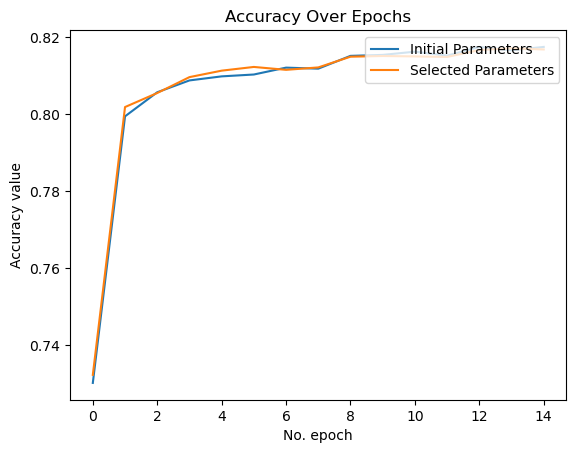

In [88]:
plt.plot(history.history['accuracy'], label='Initial Parameters')
plt.plot(history_2.history['accuracy'], label='Selected Parameters')
plt.title('Accuracy Over Epochs')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

It looks like both models had a fairly similar performance - we did not see a significant improvement in model performance by reducing the number of input features.

For our latest model, history_2, let's take a look at the performace.

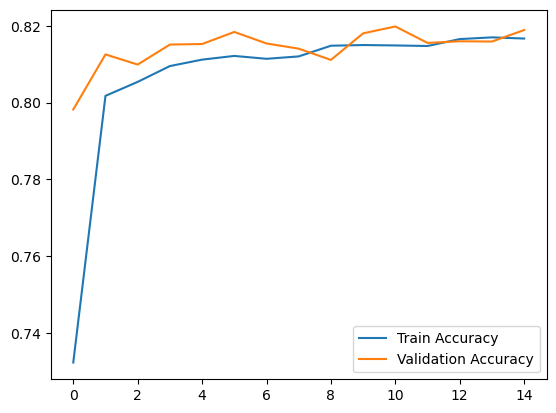

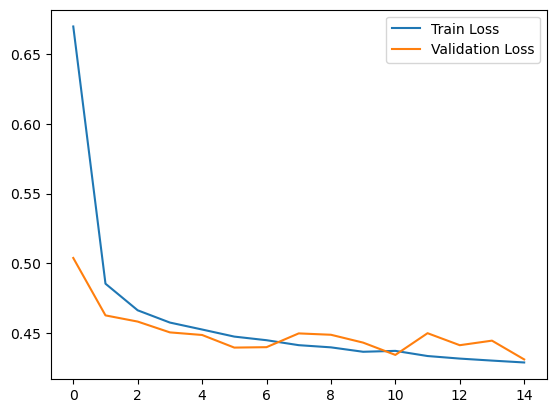

In [90]:
def plot_training_vs_overfitting(history):
    import matplotlib.pyplot as plt

    # Plot accuracy
    plt.plot(history_2.history['accuracy'], label='Train Accuracy')
    plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history_2.history['loss'], label='Train Loss')
    plt.plot(history_2.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

plot_training_vs_overfitting(history)

Although the validation line on both plots is jagged, we see that validation loss decreases as train loss decreases, suggesting that overfitting is not a big issue for our model.

## Summary Report

The aim of this project was to predict class membership of loan applications.

To give us a clearer and more detailed image of loan applications, I decided to approach this a multi-class classification problem rather than a binary classification problem. In this way, we are able to focus on predicting loan status rather than just default or non-default of a loan.

I started by importing and cleaning the dataset for use in my models. The initial dataset contained different types of data such as integers, floats, strings and date data.

I decided to implement a random forest model as my baseline model, followed by a feedforward neural network model as my challenger model.

I chose a random forest model for my baseline model as this type of model is good for multi-class classification problems and reduces overfitting. I then chose a neural network model as my challenger model as this type of model has higher accuracy and can better pick up non-linear relationships in our data. By comparing the performance of these two different models, we can get a better picture of how they can be used in this context and make a more informed decision on which we should use.

In this project, I found that our random forest baseline model actually performed better in this multi-class classification problem. Across all the metrics we tested, accuracy, precision, recall, F-1 score and ROC-AUC, the random forest model produced higher values. I think one reason this may be is because the random forest model is a tree-based model and does not require feature scaling as it is not affected by variations in the scale of the features, which proved useful for this dataset. However, we should note the limitations of this model also, such as the fact that it is slow and inefficient with very large datasets. It should also be noted that while the random forest model performed better in this project, it may be possible to achieve similar or superior results with a neural network model by applying additional, more complex techniques. Such an approach however may result in a higher computational cost.

Lending Club could use this model in their lending business and as a result, get a clearer picture of the financial status of loan applicants. This may help to better manage risk and reduce loan default costs. By having more granular detail available, such as loan status class rather than simply loan default, Lending Club can apply a more tailored approach to each applicant. For example, those deemed as higher risk applicants may be subject to higher interest rates and vice versa.
